# Modeling

In [59]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import graphviz

from sklearn.metrics import confusion_matrix as cm
from sklearn.model_selection import cross_val_score

In [29]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [42]:
X = X_train.append(X_test)
y = y_train.append(y_test)

In [43]:
y

,default3
0,0
1,0
2,0
3,1
4,1
...,...
6169,0
6170,1
6171,0
6172,0


## Logistic Regression

In [44]:
lin_reg = LogisticRegression()

In [45]:
lin_reg.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
y_pred = lin_reg.predict(X_test)

In [47]:
conf_mat = cm(y_true = y_test, y_pred = y_pred)

In [48]:
(conf_mat[0][0]+conf_mat[1][1])/conf_mat.sum()

0.7959183673469388

In [57]:
cv = cross_val_score(lin_reg, X, y, cv = 5, scoring = 'accuracy')

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be chan

In [54]:
print("avg. accuracy = "+str(round(np.mean(cv),4))+
      " std. of accuracy = "+str(round(np.std(cv),4))+
      " std. coef = "+str(round(np.std(cv)/np.mean(cv),4)))

avg. accuracy = 0.7969 std. of accuracy = 0.0025 std. coef = 0.0031


## Gradient Boosting

In [60]:
dtrain = xgb.DMatrix(X_train, label = y_train)
dtest = xgb.DMatrix(X_test, label = y_test)

In [85]:
param = {'max_depth': 20,
        'learning_rate': 0.1,
        'objective': 'binary:logistic',
        'nthread': 4,
        'eval_metric': ['error']}
evallist = [(dtest, 'test')]
num_round = 50

In [89]:
bst = xgb.train(param, dtrain, num_round, evals = evallist)

[0]	test-error:0.22789
[1]	test-error:0.21477
[2]	test-error:0.21121
[3]	test-error:0.20392
[4]	test-error:0.20230
[5]	test-error:0.20003
[6]	test-error:0.19631
[7]	test-error:0.20019
[8]	test-error:0.19695
[9]	test-error:0.19728
[10]	test-error:0.19663
[11]	test-error:0.19760
[12]	test-error:0.19744
[13]	test-error:0.19420
[14]	test-error:0.19695
[15]	test-error:0.19404
[16]	test-error:0.19355
[17]	test-error:0.19193
[18]	test-error:0.19307
[19]	test-error:0.19291
[20]	test-error:0.19193
[21]	test-error:0.19274
[22]	test-error:0.19177
[23]	test-error:0.19177
[24]	test-error:0.18999
[25]	test-error:0.18805
[26]	test-error:0.18837
[27]	test-error:0.18805
[28]	test-error:0.18837
[29]	test-error:0.18870
[30]	test-error:0.18788
[31]	test-error:0.18853
[32]	test-error:0.18772
[33]	test-error:0.18707
[34]	test-error:0.18707
[35]	test-error:0.18707
[36]	test-error:0.18740
[37]	test-error:0.18724
[38]	test-error:0.18837
[39]	test-error:0.18950
[40]	test-error:0.18902
[41]	test-error:0.18788
[4

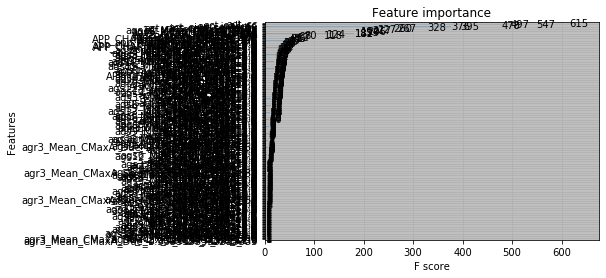

In [74]:
xgb.plot_importance(bst)

In [76]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'